In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

Importing Data

In [31]:
data_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(f'Train dataset shape: {data_train.shape}')

Train dataset shape: (1460, 81)


Data Analysis

In [32]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
data_train = data_train.drop("Id" , axis=1)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [34]:
data_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [35]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

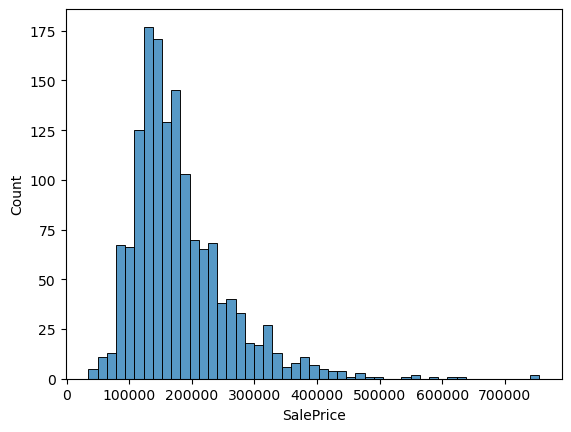

In [36]:
sn.histplot(data_train['SalePrice'])

In [37]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Removing columns that have many nulls 

In [38]:
data_train = data_train.drop((missing_data[missing_data['Total'] > 1]).index,axis=1)
data_train = data_train.drop(data_train.loc[data_train['Electrical'].isnull()].index)
data_train.isnull().sum().max()

0

In [39]:
pd.set_option('display.max_rows', 120)
data_train.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr    

List of Object columns. this list is use for label encoder

In [40]:
object_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
                 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation','Heating', 'HeatingQC', 'CentralAir', 
                 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in object_columns:
    data_train[column] = encoder.fit_transform(data_train[column])
    
data_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


Split data_train to "train" and "cross validation"

In [42]:
y = data_train['SalePrice']
X = data_train.drop('SalePrice', axis=1)
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.20, random_state=1)

print(f'X_train.shape: {X_train.shape},     y_train.shape: {y_train.shape}\n')
print(f'X_cv.shape: {X_cv.shape},         y_cv.shape: {y_cv.shape}\n')

X_train.shape: (1167, 61),     y_train.shape: (1167,)

X_cv.shape: (292, 61),         y_cv.shape: (292,)



Polynomial Regression

We use this class for test 4 types of model:**
 LinearRegression
 Ridge
 Lasso
 Elasticnet

In [43]:
class linear_model:
    
    #initial
    def __init__(self, degree, model_name):
        if model_name == "LinearRegression":
            self.lin_model = LinearRegression()
        elif model_name == "Ridge":
            self.lin_model = Ridge()
        elif model_name == "Lasso":
            self.lin_model = Lasso()
        elif model_name == "ElasticNet":
            self.lin_model = ElasticNet()
        else:
            print("Error: Incorrect model name")
            return 0
        self.poly = PolynomialFeatures(degree, include_bias=False)
        self.scaler = StandardScaler()
    
    def fit(self, X_train, y_train):
        X_train_mapped = self.poly.fit_transform(X_train)
        X_train_mapped_norm = self.scaler.fit_transform(X_train_mapped)
        self.lin_model.fit(X_train_mapped_norm, y_train)
    
    def predict(self, X):
        X_mapped = self.poly.transform(X)
        X_mapped_norm = self.scaler.transform(X_mapped)
        y_predict = self.lin_model.predict(X_mapped_norm)
        return(y_predict)

In [44]:
for model_name in ["LinearRegression", "Ridge", "Lasso", "ElasticNet"]:
    for degree in range(1,4):
        
        lin_model = linear_model(degree, model_name)
        lin_model.fit(X_train, y_train)
    
        y_train_predict = lin_model.predict(X_train)
    
        y_cv_predict = lin_model.predict(X_cv)
    
        print(f'{model_name} with degree {degree}:')
        print(f'\nRoot Mean Squared Error of training set: {mean_squared_error(y_train, y_train_predict, squared=False)}\nRoot Mean Squared Error of cross validation set: {mean_squared_error(y_cv, y_cv_predict, squared=False)}')
        print(f'\nMean absolute error of training set: {mean_absolute_error(y_train, y_train_predict)}\nMean absolute error of cross validation set: {mean_absolute_error(y_cv, y_cv_predict)}')
        print(f'\nR2 score of training set: {r2_score(y_train, y_train_predict)}\nnR2 score of cross validation set: {r2_score(y_cv, y_cv_predict)}\n')

LinearRegression with degree 1:

Root Mean Squared Error of training set: 33222.24015315621
Root Mean Squared Error of cross validation set: 28047.356046649147

Mean absolute error of training set: 19818.09283141622
Mean absolute error of cross validation set: 21021.757918032567

R2 score of training set: 0.8295617239535414
nR2 score of cross validation set: 0.8599567885022339

LinearRegression with degree 2:

Root Mean Squared Error of training set: 171.80178291727373
Root Mean Squared Error of cross validation set: 4250054672.614102

Mean absolute error of training set: 7.112354963898011
Mean absolute error of cross validation set: 1411988436.8086238

R2 score of training set: 0.9999954421016094
nR2 score of cross validation set: -3215638648.127887

LinearRegression with degree 3:

Root Mean Squared Error of training set: 171.801783493813
Root Mean Squared Error of cross validation set: 337369797791.79175

Mean absolute error of training set: 7.126111869608652
Mean absolute error of 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.123e+10, tolerance: 7.557e+08
  model = cd_fast.enet_coordinate_descent(


Lasso with degree 2:

Root Mean Squared Error of training set: 6662.327167531845
Root Mean Squared Error of cross validation set: 71185.8265032672

Mean absolute error of training set: 4291.20457100939
Mean absolute error of cross validation set: 39164.78343141579

R2 score of training set: 0.993145729844365
nR2 score of cross validation set: 0.09787800899496679



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+09, tolerance: 7.557e+08
  model = cd_fast.enet_coordinate_descent(


Lasso with degree 3:

Root Mean Squared Error of training set: 987.7569383069767
Root Mean Squared Error of cross validation set: 55225.72753435212

Mean absolute error of training set: 394.51748792345956
Mean absolute error of cross validation set: 34927.53994834768

R2 score of training set: 0.9998493360032147
nR2 score of cross validation set: 0.45704842411515634

ElasticNet with degree 1:

Root Mean Squared Error of training set: 34478.55211214409
Root Mean Squared Error of cross validation set: 27539.88214855575

Mean absolute error of training set: 19382.353074347382
Mean absolute error of cross validation set: 19687.57693720895

R2 score of training set: 0.816427616922031
nR2 score of cross validation set: 0.8649786763836034



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.381e+11, tolerance: 7.557e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet with degree 2:

Root Mean Squared Error of training set: 20033.175296446756
Root Mean Squared Error of cross validation set: 27633.125163826153

Mean absolute error of training set: 12921.17301429625
Mean absolute error of cross validation set: 18274.51232635787

R2 score of training set: 0.9380260912050785
nR2 score of cross validation set: 0.8640628330848275



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+11, tolerance: 7.557e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet with degree 3:

Root Mean Squared Error of training set: 9769.95683415681
Root Mean Squared Error of cross validation set: 29110.17354156001

Mean absolute error of training set: 6115.513027975238
Mean absolute error of cross validation set: 20723.190112483197

R2 score of training set: 0.9852600980027432
nR2 score of cross validation set: 0.8491421912446577



we found that ElasticNet with degree 1 is better than other one in these methods

In [45]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_cv_norm = scaler.transform(X_cv)

print(f'X_train_norm.shape: {X_train_norm.shape},     X_cvc_norm.shape: {X_cv_norm.shape}\n')

X_train_norm.shape: (1167, 61),     X_cvc_norm.shape: (292, 61)



# Ensemble Trees
**We use this cell for test 7 types of model:**
* Bagging
* Pasting
* RandomForest
* ExtraTrees
* AdaBoost
* GrasientBoosting
* XGBoost

In [46]:
models = [BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, max_samples=400, bootstrap=True, n_jobs=-1),
         BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, max_samples=400, bootstrap=False, n_jobs=-1),
         RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1),
         ExtraTreesRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1),
         AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=500, learning_rate=0.5),
         GradientBoostingRegressor(n_estimators=500, random_state=42, learning_rate=0.5),
         XGBRegressor(n_estimators=500, random_state=42, learning_rate=0.5, n_jobs=-1)]

for model in models:

    model.fit(X_train_norm, y_train)
    
    y_train_predict = model.predict(X_train_norm)  
    
    y_cv_predict = model.predict(X_cv_norm)  
    
    print(model)
    print(f'\nRoot Mean Squared Error of training set: {mean_squared_error(y_train, y_train_predict, squared=False)}\nRoot Mean Squared Error of cross validation set: {mean_squared_error(y_train, y_train_predict, squared=False)}')
    print(f'\nMean absolute error of training set: {mean_absolute_error(y_train, y_train_predict)}\nMean absolute error of cross validation set: {mean_absolute_error(y_cv, y_cv_predict)}')
    print(f'\nR2 score of training set: {r2_score(y_train, y_train_predict)}\nnR2 score of cross validation set: {r2_score(y_cv, y_cv_predict)}\n')

BaggingRegressor(estimator=DecisionTreeRegressor(), max_samples=400,
                 n_estimators=500, n_jobs=-1)

Root Mean Squared Error of training set: 22683.133861757447
Root Mean Squared Error of cross validation set: 22683.133861757447

Mean absolute error of training set: 12886.94429877178
Mean absolute error of cross validation set: 16359.588041095893

R2 score of training set: 0.9205460637436167
nR2 score of cross validation set: 0.8992119654382423

BaggingRegressor(bootstrap=False, estimator=DecisionTreeRegressor(),
                 max_samples=400, n_estimators=500, n_jobs=-1)

Root Mean Squared Error of training set: 20862.347332628826
Root Mean Squared Error of cross validation set: 20862.347332628826

Mean absolute error of training set: 11850.114940874037
Mean absolute error of cross validation set: 16255.674842465754

R2 score of training set: 0.9327897285613517
nR2 score of cross validation set: 0.8992581738751709

RandomForestRegressor(max_leaf_nodes=16, n_estimator

we found that bagging regressor is better than other ensemble trees and polynomial regression.

# Final Model

In [47]:
best_model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, max_samples=400, bootstrap=True, n_jobs=-1)
best_model.fit(X_train_norm, y_train)

y_train_predict = best_model.predict(X_train_norm)
    
y_cv_predict = best_model.predict(X_cv_norm)  
    
print(f'\nRoot Mean Squared Error of training set: {mean_squared_error(y_train, y_train_predict, squared=False)}\nRoot Mean Squared Error of cross validation set: {mean_squared_error(y_cv, y_cv_predict, squared=False)}')
print(f'\nMean absolute error of training set: {mean_absolute_error(y_train, y_train_predict)}\nMean absolute error of cross validation set: {mean_absolute_error(y_cv, y_cv_predict)}')
print(f'\nR2 score of training set: {r2_score(y_train, y_train_predict)}\nnR2 score of cross validation set: {r2_score(y_cv, y_cv_predict)}\n')


Root Mean Squared Error of training set: 22858.599928553576
Root Mean Squared Error of cross validation set: 24104.66063278532

Mean absolute error of training set: 13002.37774807198
Mean absolute error of cross validation set: 16492.858591324202

R2 score of training set: 0.9193120726997424
nR2 score of cross validation set: 0.8965619679994099



In [48]:
data_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print(f'Test dataset shape: {data_test.shape}')

test_id = data_test['Id']
data_test = data_test.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage", "GarageYrBlt", "GarageCond", "GarageType", "GarageFinish"
                           , "GarageQual", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtFinType1", "MasVnrArea", "MasVnrType"], axis=1)
print(f'Test dataset shape: {data_test.shape}')

for column in object_columns:
    data_test[column] = encoder.fit_transform(data_test[column])  
    
data_test = data_test.fillna(0)
    
data_test.isnull().sum().sort_values(ascending=False)

data_test_norm = scaler.transform(data_test)

Test dataset shape: (1459, 80)
Test dataset shape: (1459, 61)


In [49]:
test_predict = best_model.predict(data_test_norm)

submission = pd.DataFrame(test_id, columns = ['Id'])

submission['SalePrice'] = test_predict

submission.head()

,Id,SalePrice
0,1461,127661.778
1,1462,155016.428
2,1463,174533.748
3,1464,182582.936
4,1465,205487.060


In [50]:
submission.to_csv("submission.csv", index=False, header=True)